In [9]:
import pandas as pd
import os
import datetime as dt
date_fmt ='%Y%m%d'
import time

In [10]:
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

In [11]:
path ='shortdata'
exch ='CNMS'
findme = os.path.join(path,exch)
derp = getListOfFiles(findme)

In [15]:
# create empty list
dataframes_list = []

    
for file in derp:
    working = open(file,'r')
    temp_df = pd.read_csv(file, delimiter='|',skipfooter=1, engine='python')
    dataframes_list.append(temp_df)
df = pd.concat(dataframes_list)
df["Date"] = pd.to_datetime(df["Date"], format='%Y%m%d')

In [16]:
Symbols = df.Symbol.unique()
Symbols

gk = df.groupby('Symbol')

In [17]:
starttime = time.time()
list_time = []
list_df = []
counter = 0 
for symbol in Symbols: 
    counter += 1 
    sgk = gk.get_group(symbol)
    sgk = sgk.sort_values(by='Date')

    list_time.append(time.time()-starttime)
    #df = df.drop(df[df['Symbol'] == symbol].index)
    


sgk.head()

,Date,Symbol,ShortVolume,ShortExemptVolume,TotalVolume,Market
4955,2021-12-08,ITQRU,1000,1000,4950,Q


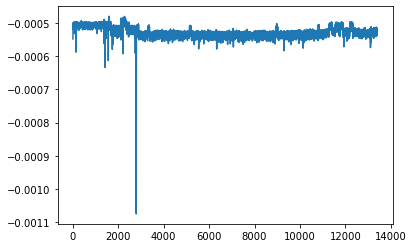

In [18]:
from matplotlib import pyplot as plt
import numpy as np
np_time = np.array(list_time)
plt.plot(np_time[:-2]-np_time[2:])

In [16]:
path = '/home/pookie/git/shorts/FastSorting/stockdata'
filename = 'CNMS0_data.csv'
pathf = os.path.join(path,filename)
dd = pd.read_csv(pathf)
gg = dd[['symbol','sharesOutstanding']]

In [30]:
for row in gg.iterrows():
    pass
row[1].sharesOutstanding

34500000.0

In [21]:


main_df = pd.DataFrame()

print(main_df.head())
for symbol in Symbols[:10]:
    print('=== new row ===')
    print(symbol)
    derp = getSymbolInfo(symbol)
    if derp != None:
        df = pd.DataFrame.from_dict(derp, orient='index').T
        main_df = pd.concat([main_df,df], ignore_index = True)
main_df.head()

Empty DataFrame
Columns: []
Index: []
=== new row ===
A
A Share Outstating: 302000992
=== new row ===
AA
AA Share Outstating: 187103008
=== new row ===
AAA
 ::  Problem with yf.Ticker(AAA).info
=== new row ===
AAAU
 ::  Problem with yf.Ticker(AAAU).info
=== new row ===
AAC
AAC Share Outstating: 100000000
=== new row ===
AAC/WS
AAC/WS Share Outstating: 100000000
=== new row ===
AACG
AACG Share Outstating: 31376900
=== new row ===
AACIW
 ::  Problem with yf.Ticker(AACIW).info
=== new row ===
AADI
AADI Share Outstating: 20894000
=== new row ===
AADR
 ::  Problem with yf.Ticker(AADR).info


,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,website,...,fiveYearAvgDividendYield,fiftyTwoWeekLow,bid,tradeable,dividendYield,bidSize,dayHigh,regularMarketPrice,logo_url,address2
0,95051,Healthcare,17000,"Agilent Technologies, Inc. provides applicatio...",Santa Clara,800 227 9770,CA,United States,[],https://www.agilent.com,...,0.77,112.47,140.03,False,0.0056,1000,145.14,144.68,https://logo.clearbit.com/agilent.com,NaN
1,15212-5858,Basic Materials,12900,"Alcoa Corporation, together with its subsidiar...",Pittsburgh,412-315-2900,PA,United States,[],https://www.alcoa.com,...,None,17.3,61.31,False,0.0066,1800,61.44,61.39,https://logo.clearbit.com/alcoa.com,Suite 500
2,10167,Financial Services,NaN,Ares Acquisition Corporation focuses on effect...,New York,310 201 4100,NY,United States,[],https://www.aresacquisitioncorporation.com,...,None,9.5,9.74,False,None,2200,9.759,9.74,https://logo.clearbit.com/aresacquisitioncorpo...,44th Floor
3,10167,Financial Services,NaN,Ares Acquisition Corporation focuses on effect...,New York,310 201 4100,NY,United States,[],https://www.aresacquisitioncorporation.com,...,None,9.5,9.74,False,None,2200,9.759,9.74,https://logo.clearbit.com/aresacquisitioncorpo...,44th Floor
4,100022,Consumer Defensive,580,"ATA Creativity Global, together with its subsi...",Beijing,86 10 6518 1133,NaN,China,[],https://www.atai.net.cn,...,None,1,1.87,False,None,1200,2.09,1.91,https://logo.clearbit.com/atai.net.cn,"East Gate, Floor 1 Jian Wai Soho No.39 Dong Sa..."


In [26]:
print(main_df[['symbol','sharesOutstanding']])

  symbol sharesOutstanding
0      A         302000992
1     AA         187103008
2    AAC         100000000
3    AAC         100000000
4   AACG          31376900
5   AADI          20894000


In [12]:
t1_df = pd.DataFrame({'Symbol': ['GME'], 
                     'Cap': [213455612]})
t2_df = pd.DataFrame({'Symbol': ['GME'], 
                     'Cap': [213455612],
                     'TextString ': ['Mytext']})

In [13]:
testy = pd.concat([t1_df, t2_df], ignore_index=True)

In [14]:
testy.dropna()

,Symbol,Cap,TextString
1,GME,213455612,Mytext


In [27]:
pwd

'/home/pookie/git/shorts/notebooks'

In [29]:
path = '/home/pookie/git/shorts/FastSorting/stockdata'
dd = pd.read_csv(path+'/CNMS_data.csv')

In [31]:
dd['sharesOutstanding']

0    302000992
1    187103008
Name: sharesOutstanding, dtype: int64